<table style="background-color: transparent;">
    <tr style="background-color: transparent;">
        <td width="300px"><font size="15" color="#f25625">Segunda Escuela de Verano<font></td>
        <td>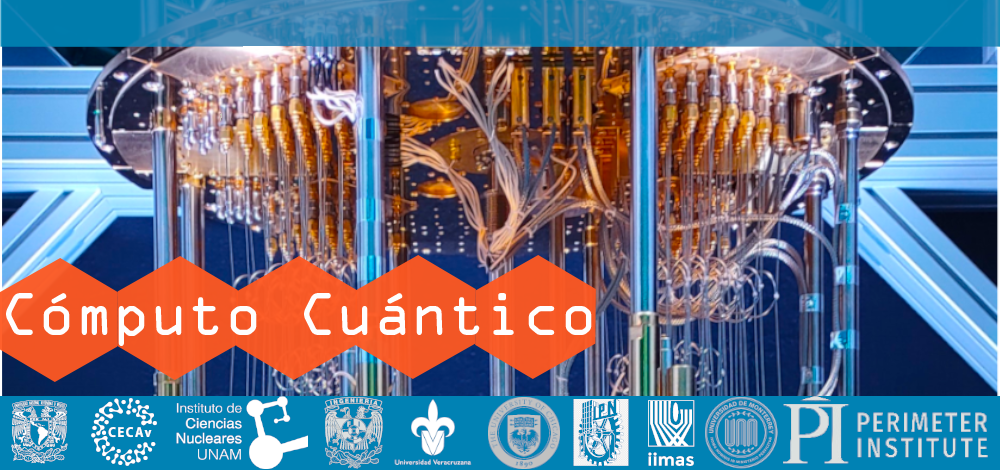</td>
    </tr>
</table>

<p style="text-align:right; font-weight:bold;">Autora: Claudia Zendejas-Morales</p>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

# <center> Introducción a Qiskit

## Contenido

1. [Introducción](#1)
    1. [Computación cuántica, ¿cómo la uso?](#1.1)
    2. [¿En dónde estamos actualmente?](#1.2)
2. [Qubit](#2)
   1. [Representación de los qubits: Matemáticamente](#2.1)
   2. [Representación de los qubits: Esfera de Bloch](#2.2)
   3. [Representación de los qubits: Qiskit](#2.3)
3. [Circuito Cuántico](#3)
   1. [Orden de los qubits](#3.1)
4. [Compuerta Cuántica](#4)
   1. [Representación de las compuertas: matemáticamente](#4.1)
   2. [Compuertas de un sólo qubit](#4.2)
      1. [Compuertas de Pauli](#4.2.1)
      2. [Rotaciones con otros ángulos](#4.2.2)
      3. [Compuerta Hadamard](#4.2.3)
      4. [Compuertas de cambio de fase](#4.2.4)
      5. [Compuerta más general de un qubit](#4.2.5)
5. [Referencias](#5)

<a id="1"></a>
# 1. Introducción

<a id="1.1"></a>
## 1.A. Computación cuántica, ¿cómo la uso?

La computación cuántica es una tecnología de rápido crecimiento que aprovecha las leyes de la mecánica cuántica (como la superposición, la interferencia y el entrelazamiento) para resolver problemas demasiado complejos para las computadoras clásicas. Los dispositivos que realizan cálculos cuánticos se conocen como computadoras cuánticas.

De manera análoga a la computación clásica, podemos crear **algoritmos cuánticos** que se ejecutan en estas nuevas computadoras. Actualmente una manera popular de implementar estos algoritmos es con **circuitos cuánticos**, los cuales necesitan **compuertas cuánticas** para definirlos.

En esta escuela de verano veremos cómo crear estos circuitos cuánticos, cómo ejecutarlos en un simulador y en una computadora cuántica real.

<a id="1.2"></a>
## 1.B. ¿En dónde estamos actualmente?

Las computadoras cuánticas que tenemos hoy en día son demasiado pequeñas (pocos qubits) e inestables para dar una ventaja sobre las computadoras tradicionales.

En un nivel muy simple, hay dos factores que limitan el tamaño de los problemas que pueden resolver las computadoras cuánticas de hoy en día. 

El primero es la cantidad de datos que se pueden almacenar y por lo tanto trabajar con estos, que normalmente medimos en qubits. Un **qubit** es un *bit cuántico*. Si no tenemos suficientes qubits, simplemente no podemos almacenar ni operar problemas por encima de cierto tamaño. 

El segundo es la tasa de error de nuestra computadora cuántica; crear computadoras cuánticas es un proceso delicado. Las computadoras cuánticas que tenemos ahora son ruidosas, lo que significa que a menudo se equivocan e introducen "*ruido*". El ruido es información inútil que es difícil de distinguir de la información útil.

Por ejemplo, la estimación para factorizar un número muy grande (por ejemplo de 617 dígitos) en menos de un día asume una cantidad de ~20 millones de qubits ruidosos. En el momento de escribir esto (verano 2023), IBM ha creado una computadora cuántica de 127 qubits y tiene como objetivo crear un sistema con más de 1000 qubits en el futuro cercano. Hay otros algoritmos que creemos que nos darán una ventaja cuántica mucho antes de este hito, ver por ejemplo el artículo recién publicado de IBM: "[Evidence for the utility of quantum computing before fault tolerance](https://www.nature.com/articles/s41586-023-06096-3)" ("Evidencia de la utilidad de la computación cuántica antes de la tolerancia a fallas").

Actualmente, por ejemplo, existen empresas que están invirtiendo en algorimos cuánticos y computación cuántica con el fin de aprovechar esa ventaja.

Afortunadamente, cualquier interesado, puede ejecutar y crear algoritmos cuánticos propios en miras de aprender a usar esta nueva tecnología.

<a id="2"></a>
# 2. Qubit

Al igual que en las computadoras digitales estándar (computadoras clásicas) la unidad fundamental son los **bits**, en las computadoras cuánticas tenemos a los **qubits**, una extensión del bit a la mecánica cuántica.

Una definición más precisa de **qubit** sería:

<div class="alert alert-block alert-success">
Un qubit es un sistema mecánico cuántico de dos estados (o dos niveles) que pertenece a un espacio de Hilbert bidimensional ($\mathbb{C}^2$).

Un [espacio de Hilbert](https://en.wikipedia.org/wiki/Hilbert_space) es un [espacio vectorial](https://en.wikipedia.org/wiki/Vector_space) que define un producto interior. El espacio vectorial ocupado para definir a los qubits utiliza el campo de los números complejos $\mathbb{C}$ y como deseamos que sea bidimensional, es que se expresa como $\mathbb{C}^2$, es decir, necesitamos 2 números complejos para describir a un **qubit**.

### Recordatorio: Números complejos

Un número complejo $\mathbb{C}$ es un elemento de un sistema numérico que amplía los números reales con un elemento específico denotado con $i$, llamado **unidad imaginaria** y satisface la ecuación 

$$i^2 = −1$$

todo número complejo se puede expresar en la forma

$$z=a + bi$$

donde $a$ y $b$ son números reales, teniendo así una *parte real* ($a$) y otra *parte imaginaria* ($b$). 

Así $a,b\in\mathbb{R}$, mientras que $z\in\mathbb{C}$.

<a id="2.1"></a>
## 2.A. Representación de los qubits: Matemáticamente

Para representar a los qubits de manera matemática, se utiliza la **[notación de Dirac](https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation)**, también conoida como notación *bra-ket*.

El estado $\ket{0}$ se pronuncia "**ket 0**", y el estado $\ket{1}$ es "**ket 1**". Esto dos estados (o qubits) son ortogonales entre sí y forman una base $\{\ket{0}, \ket{1}\}$, llamada **base computacional**, debido a que abarcan el [espacio vectorial](https://en.wikipedia.org/wiki/Vector_space) lineal bidimensional (espacio de Hilbert, $\mathbb{C}^2$) del qubit.

La notación de Dirac es una manera corta de escribir **vectores**. Hemos dicho que un qubit es un estado de dos niveles, y para representar qué tanto tenemos de cada nivel, necesitamos un vector de dos dimensiones. La manera más general de escribir un estado cuántico (un quibit) es entonces:

$$\ket{\psi}=\mymatrix{r}{ \alpha \\ \beta }$$

donde $\alpha,\beta\in\mathbb{C}$ y el ket $\ket{\psi}$ es la forma corta de escribir el estado de dos niveles (el vector).

En el caso de los elementos de la base computacional $\{\ket{0}, \ket{1}\}$, representan a los *vectores de estado* siguientes:

$$\ket{0}=\mymatrix{r}{ 1 \\ 0 } ~~~~~~~~~~~~~~~~~~~~ \ket{1}=\mymatrix{r}{ 0 \\ 1 }$$

Entonces, un qubit, es una superposición de los estados base, es decir, un qubit puede ser expresado como la [combinación lineal](https://en.wikipedia.org/wiki/Linear_combination) de $\ket{0}$ y $\ket{1}$:

$$\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$$

donde $\alpha$ y $\beta$ son [amplitudes de probabilidad](https://en.wikipedia.org/wiki/Probability_amplitude). Cuando medimos este qubit, en la base computacional, la probabiliadad de obtener el estado $\ket{0}$ es de $|\alpha|^2$ y la probabilidad de obtener el estado $\ket{1}$ es de $|\beta|^2$. Debido a que los cuadrados de los valores absolutos de las amplitudes equivalen a probabilidades, se deduce que $\alpha$ y $\beta$ deben estar restringidos de acuerdo con el [segundo axioma de la teoría de la probabilidad](https://en.wikipedia.org/wiki/Probability_axioms#Second_axiom) mediante la ecuación:

$$|\alpha|^2 + |\beta|^2 = 1$$

**Nota**: Dada esta restrición, notemos que la longitud de los vectores siempre será igual a $1$.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>:

$$\ket{\psi}=\frac{\sqrt{3}}{2}\ket{0}+\frac{1}{2}\ket{1}=\mymatrix{c}{ \dfrac{\sqrt{3}}{2} \\\\ \dfrac{1}{2} }$$

La probabilidad de observar el estado $\ket{0}$ es de $\left|\dfrac{\sqrt{3}}{2}\right|^2=\dfrac{3}{4}$, que es $75\%$.
    
La probabilidad de observar el estado $\ket{1}$ es de $\left|\dfrac{1}{2}\right|^2=\dfrac{1}{4}$, que es $25\%$.
    
La suma de las probabilidades para cada caso: $\dfrac{3}{4}+\dfrac{1}{4}=1$, que es $100\%$.

### Recordatorio: Base de un espacio vectorial

Un conjunto $B$ de vectores en un espacio vectorial $V$ se llama **base** si cada elemento de $V$ puede escribirse de manera única como una combinación lineal finita de elementos de $B$.

De manera equivalente, un conjunto $B$ es una base si sus elementos son linealmente independientes y cada elemento de $V$ es una combinación lineal de elementos de $B$. En otras palabras, una base es un *conjunto generador* linealmente independiente.

### Otras bases para los qubits

La base más común es la previamente mencionada, la base computacional, definida por los vectores: $\{\ket{0}, \ket{1}\}$.

Pero podemos usar cualesquiera otros dos vectores para definir una base para los qubits, siempre y cuando, sean linealmente independientes, pertenezcan al espacio vectorial, en este caso el espacio de $\mathbb{C}^2$ (dos números complejos).

Sin embargo, hay bases que sirven para entablar una comunicación entre quienes hacemos comptación cuántica, y las bases con elementos ortogonales son preferidas.

Otra base común es $\{\ket{+}, \ket{-}\}$, donde la definición de estos vectores es,

$$\ket{+}=\mymatrix{r}{ \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} } ~~~~~~~~~~~~~~~~~~~~ \ket{-}=\mymatrix{r}{ \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} }$$

Estos estados también pueden ser escritos en términos de la base computacional como,

$$\ket{+}=\dfrac{1}{\sqrt2}\Big(\ket{0}+\ket{1}\Big)$$

$$\ket{-}=\dfrac{1}{\sqrt2}\Big(\ket{0}-\ket{1}\Big)$$

Notemos que los coeficientes de ambas bases, son números reales, deben pertenecer a los complejos, pero en particular ahora tenemos que $z=a+0i$, por lo que queda solo la parte real (siguen siendo números dentro del campo $\mathbb{C}$).

Entonces es fácil realizar una gráfica de estos cuatro vectores:

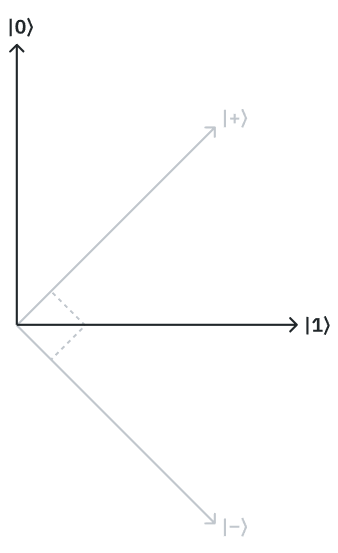

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://learn.qiskit.org/course/introduction/describing-quantum-computers" target="_blank">Imagen obtenida del Libro de Texto de Qiskit</a></p>

<a id="2.2"></a>
## 2.B. Representación de los qubits: Esfera de Bloch

¿Qué pasa si las amplitudes de los qubits ya no son solo números reales?

Entonces serán números complejos, como se mencionó anteriormente, es decir $b\neq 0$, teniendo así tanto la parte real como la imaginaria: $z=a+bi$.

Debido a que un qubit se escribe,

$$\ket{\psi}=\mymatrix{r}{ \alpha \\ \beta }$$

con $\alpha,\beta\in\mathbb{C}$, es decir, necesita dos números complejos, y a su vez cada número complejo necesita de 2 números reales para poder escribirlo, entonces, necesitamos en total $4$ números reales para representar a un qubit.

$$\alpha=a+bi$$

$$\beta=c+di$$

donde $a,b,c,d \in \mathbb{R}$.

Podría parecer a primera vista que se tienen $4$ grados de libertad para un qubit, sin embargo, un grado de libertad deja de ser *libre* debido a la restricción de normalización: $|\alpha|^2 + |\beta|^2 = 1$. Tenemos ahora 3 grados de libertad.

Entonces, utilizando una *transformación* de coordenadas conveniente, se puede eliminar ese grado de libertad, es decir, lograr la conversión de $\mathbb{R}^4\rightarrow\mathbb{R}^3$. Una elección posible son las [coordenadas de Hopf](https://en.wikipedia.org/wiki/3-sphere#Hopf_coordinates), que manda el espacio de $4$ dimensiones a la superficie de una esfera unitaria en $3$ dimensiones.

Después de considerar que para un qubit, una *fase global* del estado no tiene consecuencias físicamente observables, se obtiene la **esfera de Bloch** (más detalles [aquí](https://en.wikipedia.org/wiki/Qubit#Bloch_sphere_representation)).

<div class="alert alert-block alert-success">
La esfera de Bloch es una representación geométrica de un sistema mecánico cuántico de dos niveles (un quibit).

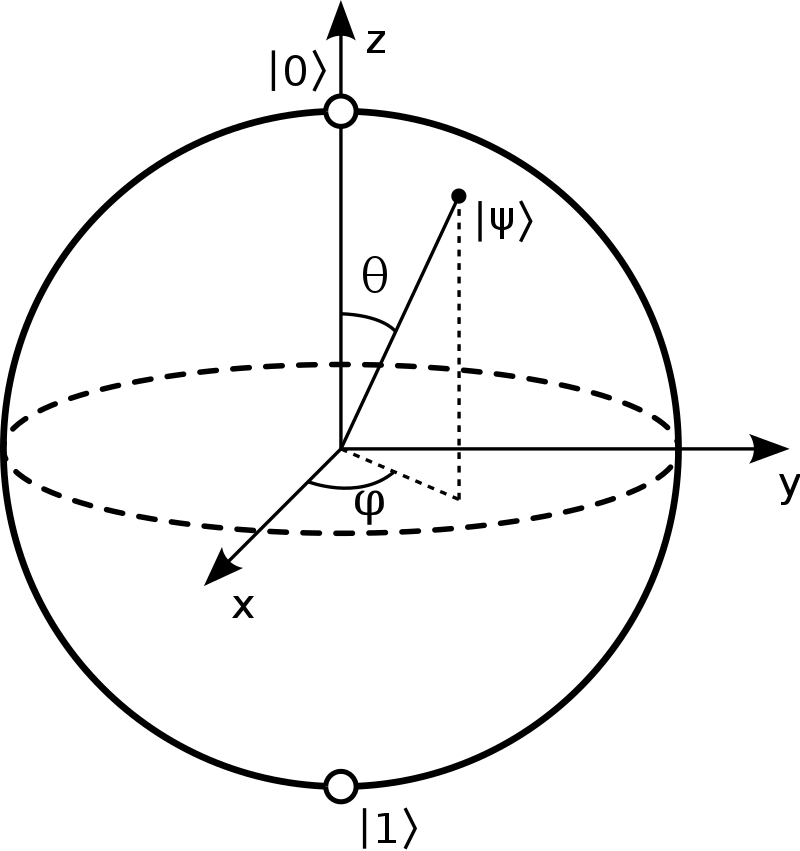

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://en.wikipedia.org/wiki/Bloch_sphere" target="_blank">Imagen obtenida de Wikipedia</a></p>

Entonces, el estado cuántico, en términos de la esfera de Bloch, se escribe como,

$$\begin{aligned}
\ket{\psi}&=\cos\left(\frac{\theta}{2}\right) \, \ket{0}+e^{i\varphi}\sin\left(\frac{\theta}{2}\right) \, \ket{1}\\\\\\
&=\cos\left(\frac{\theta}{2}\right)\mymatrix{r}{ 1 \\ 0 } + e^{i\varphi}\sin\left(\frac{\theta}{2}\right)\mymatrix{r}{ 0 \\ 1 }\\\\
&=\mymatrix{r}{ \cos\left(\frac{\theta}{2}\right) \\ e^{i\varphi}\sin\left(\frac{\theta}{2}\right) }
\end{aligned}$$

donde 

$$0\leq\theta\leq\pi$$

$$0\leq\varphi < 2\pi$$

Entonces, la transformación es,

$$\alpha=\cos\left(\frac{\theta}{2}\right)$$

$$\beta=e^{i\varphi}\sin\left(\frac{\theta}{2}\right)$$

Notemos que bajo esta transformación, $\alpha\in\mathbb{R}$ y $\beta\in\mathbb{C}$.

$$$$

**Nota**: Los parámetros $\theta$ y $\varphi$, respectivamente pueden ser reinterpretados en coordenadas esféricas como la [colatitud](https://en.wikipedia.org/wiki/Colatitude) con respecto al eje $z$ y la [longitud](https://en.wikipedia.org/wiki/Longitude) con respecto al eje $x$. Es decir, $(x,y,z)=(\sin\theta\cos\varphi, \sin\theta\sin\varphi, \cos\theta)$ con $r=1.$

$$$$

En la esfera de Bloch, los [puntos antipodales](https://en.wikipedia.org/wiki/Antipodal_point) corresponden a un par de vectores de estado mutuamente ortogonales. El *polo norte* y el *polo sur* de la esfera de Bloch generalmente se eligen para que correspondan a los vectores base estándar $\ket{0}$ y $\ket{1}$ (canónicos), respectivamente, que a su vez podría corresponder, por ejemplo, a los estados de 'espín arriba' y 'espín abajo' de un electrón, a veces escritos como: $\ket{\uparrow}$ y $\ket{\downarrow}$. Sin embargo, esta **elección es arbitraria**.

Entonces, los estados $\ket{0}$ y $\ket{1}$ en los polos norte y sur, son **espacialmente antiparalelos** (lo que observamos en la esfera de Bloch), pero **en el espacio de Hilbert son ortogonales**.

En efecto, es un poco confuso tener dos nociones diferentes de "ortogonal", una para el espacio físico y otra para el espacio de Hilbert, pero esto viene del hecho de tener dos espacios diferentes en los que debemos pensar.

### Otras bases en la esfera Bloch

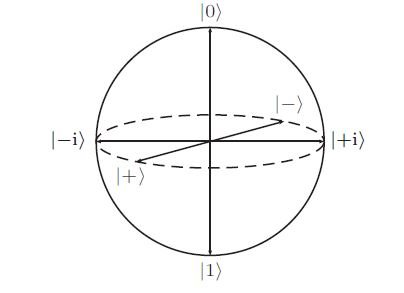

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://en.wikipedia.org/wiki/File:Six_states_Bloch_sphere.jpg" target="_blank">Imagen obtenida de Wikipedia</a></p>

La base formada por $\{\ket{0}, \ket{1}\}$ son puntos antipodales sobre el eje $z$. La base formada por $\{\ket{+}, \ket{-}\}$ son puntos antipodales sobre el eje $x$. Entonces podemos esperar que exista una base que esté situada en el eje $y$, y así es, dicha base está formada por los estados $\{\ket{+i}, \ket{-i}\}$, que en términos de la base computacional se escriben,

$$\ket{+i}=\dfrac{1}{\sqrt2}\Big(\ket{0}+i\ket{1}\Big)=\mymatrix{r}{ \frac{1}{\sqrt{2}} \\ \frac{i}{\sqrt{2}} }$$

$$\ket{-i}=\dfrac{1}{\sqrt2}\Big(\ket{0}-i\ket{1}\Big)=\mymatrix{r}{ \frac{1}{\sqrt{2}} \\ -\frac{i}{\sqrt{2}} }$$

$$$$

**Nota**: Estas tres bases son las más comunes, pero no son las únicas, mientras un par de estados, o vectores, sirvan para generar el espacio, pueden formar una base es decir, que no sean linealmente dependientes en el espacio de Hilbert.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Veamos que los elementos de la base $\{\ket{+i}, \ket{-i}\}$ efectivamente son ortogonales.
    
$$$$
    
Dos vectores son ortogonales cuando su producto interno es igual a cero, en notación de Dirac, se escribe como un **braket**, es decir: $\braket{\phi}{\psi}$, en donde el bra $\bra{\phi}$ indica el complejo conjugado transpuesto del vector $\ket{\phi}$, entonces tenemos que

$$$$
    
$$\braket{+i}{-i}=\mymatrix{r}{ \frac{1}{\sqrt{2}} \\ \frac{i}{\sqrt{2}} }^* \; \mymatrix{r}{ \frac{1}{\sqrt{2}} \\ \frac{-i}{\sqrt{2}} }=\mymatrix{r}{ \frac{1}{\sqrt{2}} & \frac{-i}{\sqrt{2}} }\cdot\mymatrix{r}{ \frac{1}{\sqrt{2}} \\ \frac{-i}{\sqrt{2}} }=\left(\frac{1}{\sqrt{2}}\right)\left(\frac{1}{\sqrt{2}}\right)+\left(\frac{-i}{\sqrt{2}}\right)\left(\frac{-i}{\sqrt{2}}\right)=\frac{1}{2}-\frac{1}{2}=0$$

<a id="2.3"></a>
## 2.C. Representación de los qubits: Qiskit

En Qiskit podemos crear qubits con la clase `QuantumRegister` como sigue:

In [ ]:
from qiskit import QuantumRegister

qubit1 = QuantumRegister(1)         # el parámetro indica cuántos qubits queremos

qubit2 = QuantumRegister(1, 'qreg') # se puede indicar un nombre al registro cuántico (parámetro opcional)

In [ ]:
print(qubit1) # al no especificar el nombre, le asigna uno con una numeración consecutiva
print(qubit2)

La base que usa **Qiskit**, es la **base computacional**: $\{\ket{0}, \ket{1}\}$.

<a id="3"></a>
# 3. Circuito Cuántico

Debemos tener en dónde usar los qubits, para eso tenemos al **circuito cuántico**.

<div class="alert alert-block alert-success">
Un circuito cuántico es un modelo de computación cuántica, similar a los circuitos clásicos, en los que una computación es una secuencia de compuertas cuánticas, mediciones, inicializaciones de qubits a valores conocidos y posiblemente otras acciones.

El conjunto mínimo de acciones que un circuito debe poder realizar en los qubits para permitir la computación cuántica se conoce como los [criterios de DiVincenzo](https://en.wikipedia.org/wiki/DiVincenzo%27s_criteria).

Este tipo de circuitos se escriben de manera en que el eje horizontal representa al tiempo, comenzando en el lado izquierdo y terminando en el derecho. Las líneas horizontales son qubits, las líneas dobles representan bits clásicos. Los elementos que están conectados por estas líneas son operaciones realizadas en los qubits, como mediciones o compuertas.

Veamos cómo incluir en un circuito uno de los qubits que creamos anteriormente:

In [ ]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(qubit1) # crear un circuito cuántico con un qubit

circuit.draw('mpl')              # mostramos la representación gráfica del circuito

En el siguiente ejemplo se define un circuito cuántico con 3 qubits, los cuales no tienen que ser creados necesariamente usando la clase `QuantumRegister`, sino que basta con indicar la cantidad de qubits que deseamos tenga el circuito, también se definen 2 bits clásicos (líneas dobles), y se aplican 3 compuertas. Veremos que efecto tiene cada una más adelante.

In [ ]:
circ = QuantumCircuit(3, 2) # circuito con 3 qubits y 2 bits clásicos

circ.h(0)           # aplicar compuerta H al qubit 0
circ.cx(0, 1)       # aplicar compuerta CNOT a los qubits 0 y 1
circ.cx(0, 2)       # aplicar compuerta CNOT a los qubits 0 y 2
circ.measure(0, 1)  # medir el qubit 0 en el bit clásico 1
circ.measure(2, 0)  # medir el qubit 2 en el bit clásico 0

circ.draw('mpl')    # mostrar el circuito

Como se mencionó, el tiempo ocurre de izquierda a derecha, entonces la compuerta $H$ es la que se aplica primero, y después la compuerta $CNOT_{0,1}$ y por último la compuerta $CNOT_{0,2}$, al final ocurren las mediciones.

Un importante punto a resaltar, es que *todos los qubits comienzan en el estado $\ket{0}$* (parte de los criterios de DiVincenzo).

<a id="3.1"></a>
## 3.A. Orden de los qubits

En el circuito anterior se tienen 3 qubits: $q_0$, $q_1$ y $q_2$. Dado el subíndice podemos saber cual de ellos es el primero, el segundo y el tercero. Pero al momento de hacer la relación con las expresiones matemáticas, debemos tomar en cuenta que, un estado de tres qubits tendrá el siguiente orden (respecto a la convención de Qiskit),

$$\ket{q_2 \, q_1 \, q_0}=\ket{000}$$

Más detalle más adelante.

<a id="4"></a>
# 4. Compuerta Cuántica

Una vez que tenemos qubits en un circuito cuántico, lo siguiente es manipularlos, para lograr un objetivo, implementar algoritmos cuánticos. Esta manipulación de hace con las **compuertas cuánticas**.

<div class="alert alert-block alert-success">
Las compuertas cuánticas son operadores unitarios y se describen como matrices unitarias en relación con alguna base. Usualmente se usa la base computacional. 

Las compuertas cuánticas son los componentes básicos de los circuitos cuánticos, como lo son las compuertas lógicas clásicas para los circuitos digitales convencionales. A diferencia de muchas compuertas lógicas clásicas, las compuertas lógicas cuánticas son **reversibles**.

### Recordatorio: Matriz Unitaria

En álgebra lineal, una matriz cuadrada compleja $U$ es unitaria si su transpuesta conjugada $U^*$ es también su inversa, es decir, 

$$U^*U=UU^*=UU^{-1}=I$$

donde $I$ es la matriz identidad.

En mecánica cuántica, la transpuesta conjugada se conoce como el [adjunto hermitiano](https://en.wikipedia.org/wiki/Hermitian_adjoint) de una matriz y se denota con una daga ($\dagger$), por lo que la ecuación anterior se escribe,

$$U^{\dagger}U=UU^{\dagger}=I$$

Las matrices unitarias tienen una importancia significativa en la mecánica cuántica porque conservan normas (longitudes) y, por lo tanto, amplitudes de probabilidad.

<a id="4.1"></a>
## 4.A. Representación de las compuertas: matemáticamente

Una compuerta cuántica que actúa sobre $n$ qubits, esta representada por una matriz unitaria de $2^n\times 2^n$. Los vectores que representan estados cuánticos de dos niveles (qubits) sobre los que actúan las compuertas son vectores unitarios en $2^n$ dimensiones.

Las compuertas cuánticas más comunes operan en espacios vectoriales de uno o dos qubits, al igual que las compuertas lógicas clásicas comunes operan en uno o dos bits.

La acción de una compuerta en un estado cuántico específico se encuentra multiplicando el vector $\ket{\psi_1}$ que representa el estado, por la matriz $U$ que representa la compuerta. El resultado es un nuevo estado cuántico $\ket{\psi_2}$:

$$U\ket{\psi_1}=\ket{\psi_2}$$

Cuando tenemos un qubit, $n=1$, el vector que lo representa tiene dos elementos y una compuerta que opera sobre un qubit es una matriz de $2\times 2$, obtener el estado resultante de aplicar la compuerta será como sigue,

$$U\ket{\psi_1}=\mymatrix{rr}{ u_{11} & u_{12} \\ u_{21} & u_{22} }\mymatrix{r}{ \alpha \\ \beta }=\mymatrix{r}{ \alpha \, u_{11} + \beta \, u_{12} \\ \alpha \, u_{21} + \beta \, u_{22} }=\mymatrix{r}{ \alpha' \\ \beta' }=\ket{\psi_2}$$

<a id="4.2"></a>
## 4.B. Compuertas de un sólo qubit

<a id="4.2.1"></a>
### 4.B.a. Compuertas de Pauli

Las **compuertas de Pauli** son las tres [matrices de Pauli](https://en.wikipedia.org/wiki/Pauli_matrices) ($\sigma_x, \sigma_y,\sigma_z$) y actúan sobre un solo quibit. 

Las compuertas $X$, $Y$, $Z$, respectivamente, equivalen a una rotación de $\pi$ radianes (180°) al rededor del eje $x$, $y$, $z$ en la *esfera de Bloch*.

### Compuerta $X$

Esta compuerta es equivalente a la compuerta de negación ($NOT$) en las computadoras clásicas.

También es llamada *bit-flip* ya que mapea los estados base como sigue:

$$X\ket{0} = \ket{1}$$

$$X\ket{1} = \ket{0}$$

Su representación matricial es,

$$X=NOT=\mymatrix{rr}{ 0 & 1 \\ 1 & 0 }$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Efecto de la compuerta $X$ sobre el estado $\ket{1}$
    
$$X\ket{1}=\mymatrix{rr}{ 0 & 1 \\ 1 & 0 }\mymatrix{r}{ 0 \\ 1 }=\mymatrix{r}{ 1 \\ 0 }=\ket{0}$$

En Qiskit aplicamos la compuerta $X$ con el método `x()`:

In [ ]:
circ1 = QuantumCircuit(1) # circuito con 1 qubit

circ1.x(0)                # aplicar compuerta X al (único) qubit 0

circ1.draw('mpl')         # mostrar el circuito

### Obtener el vector de estado con Qiskit

Con la clase `Statevector` de Qiskit, se puede obtener el estado de un circuito en el punto de se desee:

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex


circ1 = QuantumCircuit(1)    # circuito con 1 qubit

psi_0 = Statevector(circ1)   # estado justo después de crear el circuito

circ1.x(0)                   # aplicar compuerta X al (único) qubit 0

psi_1 = Statevector(circ1)   # estado después aplicar la compuerta X

display(circ1.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0.data))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de X:")
print("➤ en forma de vector:")
display(array_to_latex(psi_1.data))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))

### Visualización en la esfera de Bloch con Qiskit

Con la función `plot_bloch_multivector()` podemos visualizar un qubit, indicando el vector de estado.

In [ ]:
from qiskit.visualization import plot_bloch_multivector


print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de X:")
display(plot_bloch_multivector(psi_1))

### Compuerta $Y$

Esta compuerta mapea los estados base como sigue:

$$Y\ket{0}=i\ket{1}$$
$$Y\ket{1}=-i\ket{0}$$

Su representación matricial es,

$$Y=\mymatrix{rr}{ 0 & -i \\ i & 0 }$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Efecto de la compuerta $Y$ sobre el estado $\ket{+}$

Con notación de Dirac:
    
$$Y\ket{+}=Y \, \left(\dfrac{1}{\sqrt2}\Big(\ket{0}+\ket{1}\Big)\right)=\dfrac{1}{\sqrt2}\Big(Y\ket{0}+Y\ket{1}\Big)=\dfrac{1}{\sqrt2}\Big(i\ket{1}-i\ket{0}\Big)=\dfrac{-i}{\sqrt2}\Big(\ket{0}-\ket{1}\Big)=-i\ket{-}$$

Con notación matricial:
    
$$Y\ket{+}=\mymatrix{rr}{ 0 & -i \\ i & 0 }\mymatrix{r}{ \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} }=\mymatrix{r}{ \frac{-i}{\sqrt{2}} \\ \frac{i}{\sqrt{2}} }=-i\mymatrix{r}{ \frac{1}{\sqrt{2}} \\ \frac{-1}{\sqrt{2}} }=-i\ket{-}$$

En Qiskit aplicamos la compuerta $Y$ con el método `y()`:

In [ ]:
circ2 = QuantumCircuit(1)    # circuito con 1 qubit

psi_0 = Statevector(circ2)   # estado justo después de crear el circuito

circ2.y(0)                   # aplicar compuerta Y al (único) qubit 0

psi_1 = Statevector(circ2)   # estado después aplicar la compuerta Y

display(circ2.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de Y:")
print("➤ en forma de vector:")
display(array_to_latex(psi_1))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))

In [ ]:
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de Y:")
display(plot_bloch_multivector(psi_1))

¡Se ve igual que en el caso de la compuerta $X$!

¿Por qué?

***No se pueden representar las fases globales en la esfera de Bloch.***

### Compuerta $Z$

Esta compuerta mapea los estados base como sigue:

$$Z\ket{0}=\ket{0}$$
$$Z\ket{1}=-\ket{1}$$

Su representación matricial es,

$$Z=\mymatrix{rr}{ 1 & 0 \\ 0 & -1 }$$

En Qiskit aplicamos la compuerta $Z$ con el método `z()`:

In [ ]:
circ3 = QuantumCircuit(1)    # circuito con 1 qubit

circ3.x(0)                   # obtener el estado |1>

psi_0 = Statevector(circ3)   # estado justo después de crear el circuito e iniciar el qubit en |1>

circ3.z(0)                   # aplicar compuerta Z al (único) qubit en la posición 0

psi_1 = Statevector(circ3)   # estado después aplicar la compuerta Z

display(circ3.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de Z:")
print("➤ en forma de vector:")
display(array_to_latex(psi_1))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de Z:")
display(plot_bloch_multivector(psi_1))

### Matriz de transición

Si conocemos las trancisiones de las compuertas, podemos "armar" la matriz correspondiente:

<table width='40%'>

<tr>
<td style='width:50%; text-align: center'><strong>Transiciones</strong></td>
<td style='width:50%; text-align: center'><strong>Matriz</strong></td>
</tr>

<tr>
<td style='width:50%; text-align: center'>
Compuerta $X$:

$$\ket{0}\rightarrow\ket{1}$$

$$\ket{1}\rightarrow\ket{0}$$
</td>
<td style='width:50%; text-align: center'>
$
\begin{array}{c|cc} \hookleftarrow & \ket{0} & \ket{1} \\ \hline 
    \ket{0} & 0 & 1 \\ 
    \ket{1} & 1 & 0 \end{array}
$
</td>
</tr>

<tr>
<td style='width:50%; text-align: center'>
Compuerta $Y$:

$$\ket{0}\rightarrow i\ket{1}$$

$$\ket{1}\rightarrow -i\ket{0}$$
</td>
<td style='width:50%; text-align: center'>
$
\begin{array}{c|cc} \hookleftarrow & \ket{0} & \ket{1} \\ \hline 
    \ket{0} & 0 & -i \\ 
    \ket{1} & i & 0 \end{array}
$
</td>
</tr>

<tr>
<td style='width:50%; text-align: center'>
Compuerta $Z$:

$$\ket{0}\rightarrow \ket{0}$$

$$\ket{1}\rightarrow -\ket{1}$$
</td>
<td style='width:50%; text-align: center'>
$
\begin{array}{c|cc} \hookleftarrow & \ket{0} & \ket{1} \\ \hline 
    \ket{0} & 1 & 0 \\ 
    \ket{1} & 0 & -1 \end{array}
$
</td>
</tr>

</table>


<a id="4.2.2"></a>
### 4.B.b. Rotaciones con otros ángulos

Las compuertas de Pauli son rotaciones de $\pi$ radianes, pero podemos hacer que el estado cuántico rote con otros ángulos, para ello, tenemos las compuertas de rotaciones, alrededor de los ejes, definidas como sigue:

$$R_x(\phi)=\mymatrix{rr}{ \cos\left(\frac{\phi}{2}\right) & -i\sin\left(\frac{\phi}{2}\right) \\ -i\sin\left(\frac{\phi}{2}\right) & \cos\left(\frac{\phi}{2}\right) }=\cos\left(\frac{\phi}{2}\right) \, I-i\sin\left(\frac{\phi}{2}\right) \, X$$

$$R_y(\phi)=\mymatrix{rr}{ \cos\left(\frac{\phi}{2}\right) & -\sin\left(\frac{\phi}{2}\right) \\ \sin\left(\frac{\phi}{2}\right) & \cos\left(\frac{\phi}{2}\right) }=\cos\left(\frac{\phi}{2}\right) \, I-i\sin\left(\frac{\phi}{2}\right) \, Y$$

$$R_z(\phi)=\mymatrix{cc}{ e^{-i\frac{\phi}{2}} & 0 \\ 0 & e^{i\frac{\phi}{2}} }=\cos\left(\frac{\phi}{2}\right) \, I-i\sin\left(\frac{\phi}{2}\right) \, Z$$

En Qiskit existen los métodos `rx()`, `ry()` y `rz()` para lograr las rotaciones con diferentes ángulos.

En el siguiente código rotaremos el estado cuántico primero $\pi/2$ radianes al rededor dej eje $y$, lo que lo dejará sobre el eje $+x$, después lo rotaremos $\pi/4$ radianes alrededor del eje $z$ y finalmente $\pi$ radianes alrededor del eje $x$. En forma matemática, expresamos estos pasos como:

$$\ket{\psi_3}=R_x\left(\pi\right) \, R_z\left(\frac{\pi}{4}\right) \, R_y\left(\frac{\pi}{2}\right) \; \ket{0}$$

Notemos que el orden al multiplicar las matrices ocurre de derecha a izquierda, es decir, se multiplica primero la matriz que está más cerca del estado $\ket{0}$, después la que sigue a la izquierda y por último la que aparece al principio en la lectura de la expresión.

Los pasos son entonces:

$\ket{\psi_0}=\ket{0} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ =\ket{0}$

$\ket{\psi_1}= R_y\left(\frac{\pi}{2}\right) \; \ket{\psi_0} ~~~~~~~~~~~~~~ = R_y\left(\frac{\pi}{2}\right) \; \ket{0}$

$\ket{\psi_2}= R_z\left(\frac{\pi}{4}\right) \; \ket{\psi_1} ~~~~~~~~~~~~~~ = R_z\left(\frac{\pi}{4}\right) \, R_y\left(\frac{\pi}{2}\right) \; \ket{0}$

$\ket{\psi_3}=R_x\left(\pi\right) \; \ket{\psi_2} ~~~~~~~~~~~~~~~~ = R_x\left(\pi\right) \, R_z\left(\frac{\pi}{4}\right) \, R_y\left(\frac{\pi}{2}\right) \; \ket{0}$

In [ ]:
import numpy as np


circ4 = QuantumCircuit(1)    # circuito con 1 qubit

psi_0 = Statevector(circ4)   # estado justo después de crear el circuito

circ4.ry(np.pi/2, 0)         # rotar pi/2 alrededor del eje y

psi_1 = Statevector(circ4)   # estado después de la primera rotación

circ4.rz(np.pi/4, 0)         # rotar pi/4 alrededor del eje z

psi_2 = Statevector(circ4)   # estado después de la segunda rotación

circ4.rx(np.pi, 0)           # rotar pi alrededor del eje x

psi_3 = Statevector(circ4)   # estado después de la tercera rotación

display(circ4.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después rotación de pi/2 alrededor del eje y:")
print("➤ en forma de vector:")
display(array_to_latex(psi_1))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))
print()
print("👉 Estado después rotación de pi/4 alrededor del eje z:")
print("➤ en forma de vector:")
display(array_to_latex(psi_2))
print("➤ en forma de ket:")
display(psi_2.draw('latex'))
print()
print("👉 Estado después rotación de pi alrededor del eje x:")
print("➤ en forma de vector:")
display(array_to_latex(psi_3))
print("➤ en forma de ket:")
display(psi_3.draw('latex'))

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después rotación de pi/2 alrededor del eje y:")
display(plot_bloch_multivector(psi_1))

print("🔵 Estado después rotación de pi/4 alrededor del eje z:")
display(plot_bloch_multivector(psi_2))

print("🔵 Estado después rotación de pi alrededor del eje x:")
display(plot_bloch_multivector(psi_3))

<a id="4.2.3"></a>
### 4.B.c. Compuerta Hadamard

La compuerta Hadamard crea un estado de superposición de la base computacional $\{\ket{0}, \ket{1}\}$, entonces mapea los estados como sigue,

$$H\ket{0}=\mymatrix{r}{ \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} }=\ket{+}$$

$$H\ket{1}=\mymatrix{r}{ \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} }=\ket{-}$$

$$$$

La compuerta Hadamard también es una rotación, pero alrededor del eje $\frac{\left(\hat{x}+\hat{z}\right)}{\sqrt{2}}$, es decir, el eje en el plano $xz$ con 45° del estado $\ket{0}$

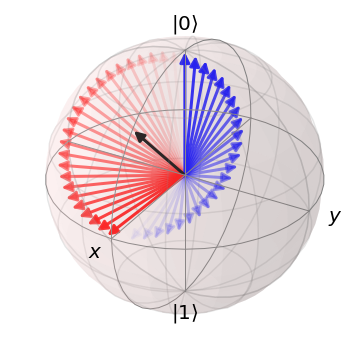

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://physics.stackexchange.com/questions/313959/visual-interpretation-on-the-bloch-sphere-when-hadamard-gate-is-applied-twice" target="_blank">Imagen obtenida de Physics StackExchange</a></p>

Su representación matricial es,

$$H=\frac{1}{\sqrt{2}} \mymatrix{rr}{1 & 1 \\ 1 & -1} = \mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}}$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Efecto de la compuerta $H$ sobre el estado $\ket{-}$

Con notación de Dirac:
    
$$\begin{aligned}
H\ket{-}&=H \, \left(\dfrac{1}{\sqrt2}\Big(\ket{0}-\ket{1}\Big)\right)=\dfrac{1}{\sqrt2}\Big(H\ket{0}-H\ket{1}\Big)\\
&=\dfrac{1}{\sqrt2}\left[\left(\dfrac{1}{\sqrt2}\Big(\ket{0}+\ket{1}\Big)\right)-\left(\dfrac{1}{\sqrt2}\Big(\ket{0}-\ket{1}\Big)\right)\right]\\
&=\dfrac{1}{2}\Big(\ket{0}+\ket{1}-\ket{0}+\ket{1}\Big)=\dfrac{1}{2}\Big(2\ket{1}\Big)=\ket{1}
\end{aligned}$$
    
Con notación matricial:
    
$$H\ket{-}=\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}}\mymatrix{rr}{ \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} }=\frac{1}{2}\mymatrix{r}{ 1-1 \\ 1+1 }=\frac{1}{2}\mymatrix{r}{ 0 \\ 2 }=\mymatrix{r}{ 0 \\ 1 }=\ket{1}$$

En Qiskit aplicamos la compuerta $H$ con el método `h()`:

In [ ]:
circ5 = QuantumCircuit(1)    # circuito con 1 qubit

psi_0 = Statevector(circ5)   # estado justo después de crear el circuito

circ5.h(0)                   # apliquemos H al estado |0>, quedamos en |+>

psi_1 = Statevector(circ5)   # estado justo después de aplicar H

circ5.z(0)                   # aplicar compuerta Z al (único) qubit 0, quedamos en el estado |->

psi_2 = Statevector(circ5)   # estado después aplicar la compuerta Z

circ5.h(0)                   # aplicar compuerta H de nuevo, quedamos en el estado |1>

psi_3 = Statevector(circ5)   # estado después aplicar la compuerta Z

display(circ5.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de primera H:")
print("➤ en forma de vector:")
display(array_to_latex(psi_1))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))
print()
print("👉 Estado después de Z:")
print("➤ en forma de vector:")
display(array_to_latex(psi_2))
print("➤ en forma de ket:")
display(psi_2.draw('latex'))
print()
print("👉 Estado después de segunda H:")
print("➤ en forma de vector:")
display(array_to_latex(psi_3))
print("➤ en forma de ket:")
display(psi_3.draw('latex'))

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de primera H:")
display(plot_bloch_multivector(psi_1))

print("🔵 Estado después de Z:")
display(plot_bloch_multivector(psi_2))

print("🔵 Estado después de segunda H:")
display(plot_bloch_multivector(psi_3))

Notemos que

$$HZH = X$$

<a id="4.2.4"></a>
### 4.B.d. Compuertas de cambio de fase

Las compuertas de cambio de fase forman una familia de compuertas de un solo qubit que mapean los estados base como sigue,

$$P(\phi) \, \ket{0} = \ket{0}$$

$$P(\phi) \, \ket{1} = e^{i\phi}\ket{1}$$

La probabilidad de medir $\ket{0}$ o $\ket{1}$ no cambia después de aplicar esta compuerta, sin embargo, modifica la fase del estado cuántico. Esto es equivalente a trazar un círculo horizontal (una línea de latitud), o una rotación a lo largo del eje $z$ en la esfera de Bloch por $\phi$ radianes. La compuerta de cambio de fase está representada por la matriz:

$$P(\phi)=\mymatrix{rr}{1 & 0 \\ 0 & e^{i\phi}}$$

donde $\phi$ es el cambio de fase con periodo $2\pi$.

Notemos que la compuerta $P(\phi)$ no es [hermitiana](https://en.wikipedia.org/wiki/Hermitian_matrix) (excepto para todos los $\phi=n\pi, \; n\in\mathbb{Z}$).

Existen compuertas con su propio nombre para algunos casos particulres del valor de $\phi$.

$$$$

**Compuertas $S$ y $S^{\dagger}$**

Es una rotación alrededor del eje $z$ por $\pi/2$ radianes, entonces

$$S=\sqrt{Z}=P\left(\frac{\pi}{2}\right)$$

La compuerta $S^{\dagger}$ es el conjugado de la compuerta $S$, entonces,

$$S^{\dagger}=P\left(-\frac{\pi}{2}\right)$$

Sus matrices son,

$$S=\mymatrix{rr}{1 & 0 \\ 0 & i} ~~~~~~~~~~~~~~~~~~~~~~~~~~~ S^{\dagger}=\mymatrix{rr}{1 & 0 \\ 0 & -i}$$

$$$$

**Compuertas $T$ y $T^{\dagger}$**

Es una rotación alrededor del eje $z$ por $\pi/4$ radianes, entonces

$$T=\sqrt{S}=\sqrt[4]{Z}=P\left(\frac{\pi}{4}\right)$$

$$T^{\dagger}=P\left(-\frac{\pi}{4}\right)$$

Sus matrices son,

$$T=\mymatrix{rr}{1 & 0 \\ 0 & e^{i\frac{\pi}{4}}} ~~~~~~~~~~~~~~~~~~~~~~~~~~~ T^{\dagger}=\mymatrix{rr}{1 & 0 \\ 0 & e^{-i\frac{\pi}{4}}}$$

En Qiskit tenemos a nuestra disposición métodos para aplicar las compuertas de cambio de fase: `p()`, `s()`, `sdg()`, `t()`, `tdg()`.

Veamos el efecto de estas compuertas, pero debido a que representan rotaciones alrededor del eje $z$, entonces partiremos del estado $\ket{+}$, para que sean notorias la rotaciones.

In [ ]:
circ6 = QuantumCircuit(1)    # circuito con 1 qubit

circ6.h(0)                   # nos movemos al estado |+>

psi_0 = Statevector(circ6)   # estado justo después de crear el circuito y posicionarse en |+>

circ6.s(0)                   # aplicar compuerta S, rotando pi/2

psi_1 = Statevector(circ6)   # estado justo después de aplicar P

circ6.tdg(0)                 # aplicar compuerta T† rotanfo -pi/4

psi_2 = Statevector(circ6)   # estado después aplicar la compuerta S

circ6.p(2*np.pi/3, 0)        # aplicar compuerta P, rotando 2pi/3

psi_3 = Statevector(circ6)   # estado después aplicar la compuerta T†

display(circ5.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial |+>:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de S:")
print("➤ en forma de vector:")
display(array_to_latex(psi_1))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))
print()
print("👉 Estado después de T†:")
print("➤ en forma de vector:")
display(array_to_latex(psi_2))
print("➤ en forma de ket:")
display(psi_2.draw('latex'))
print()
print("👉 Estado después de P(2*pi/3):")
print("➤ en forma de vector:")
display(array_to_latex(psi_3))
print("➤ en forma de ket:")
display(psi_3.draw('latex'))

print()
print("🔵 Estado inicial |+>:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de S:")
display(plot_bloch_multivector(psi_1))

print("🔵 Estado después de T†:")
display(plot_bloch_multivector(psi_2))

print("🔵 Estado después de P(2*pi/3):")
display(plot_bloch_multivector(psi_3))

<a id="4.2.5"></a>
### 4.B.e. Compuerta más general de un qubit

La compuerta que generaliza todas las compuertas de un solo qubit es la conocida como $U$ y está definida como:

$$U(\theta, \phi,\lambda)=\mymatrix{rr}{\cos\left(\frac{\theta}{2}\right) & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\ e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i\left(\phi+\lambda\right)}\cos\left(\frac{\theta}{2}\right)}$$

(en otras referencias también la puedes encontrar como compuerta $U3$)

ejemplos de equivalencias:

$$U\left(\theta, -\frac{\pi}{2}, \frac{\pi}{2}\right)=RX(\theta)$$

$$U\left(\theta, 0, 0\right)=RY(\theta)$$

En Qiskit podemos usar el método `u()` para aplicar esta compuerta:

In [ ]:
circ_u = QuantumCircuit(1)               # circuito con 1 qubit

psi_0 = Statevector(circ_u)              # estado justo después de crear el circuito e iniciar el qubit en |1>

circ_u.u(np.pi/3, np.pi/2, np.pi/5, 0)   # aplicar compuerta U3 al (único) qubit en la posición 0

psi_1 = Statevector(circ_u)              # estado después aplicar la compuerta U3

display(circ_u.draw('mpl'))              # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de U3(pi/3, pi/8, pi/5):")
print("➤ en forma de vector:")
display(array_to_latex(psi_1))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de U3(pi/3, pi/8, pi/5):")
display(plot_bloch_multivector(psi_1))

<a id="5"></a>
# 5. Referencias

- Qiskit Documentation. Consultado en https://qiskit.org/documentation/
- Qiskit Textbook. Consultado en https://qiskit.org/learn/
- Qiskit Tutorials. Consultado en https://qiskit.org/documentation/tutorials.html
- QWold's Bronze tutorial. Consultado en https://gitlab.com/qworld/bronze-qiskit
- Nielsen, M., & Chuang, I. (2010). Quantum Computation and Quantum Information: 10th Anniversary Edition. Cambridge: Cambridge University Press. DOI:10.1017/CBO9780511976667
- Kaye P., Laflamme R., & Mosca M. (2007). An Introduction to Quantum Computing. Oxford: Oxford University Press. ISBN: 9780198570493